<a href="https://colab.research.google.com/github/pixie69/RoomColour_Prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PIL.Image as Image
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [ ]:
def create_color_palette(image_path, num_colors, csv_filename):
    # Load the image
    try:
        image = Image.open(image_path).convert('RGB')  #RGB format
        image_array = np.array(image.getdata())
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Performing K-Means clustering to find dominant colors
    try:
        kmeans = KMeans(n_clusters=num_colors)
        kmeans.fit(image_array)
        dominant_colors = kmeans.cluster_centers_.astype('uint8')
    except Exception as e:
        print(f"Error during K-Means clustering: {e}")
        return

    # Calculating color usage percentages
    labels = kmeans.labels_  # Cluster assignments for each pixel
    label_counts = np.bincount(labels)
    total_pixels = labels.size
    color_percentages = (label_counts / total_pixels) * 100

    # Creating DataFrame with percentages
    palette_df = pd.DataFrame(dominant_colors, columns=['R', 'G', 'B'])
    palette_df['Hex'] = palette_df.apply(lambda row: '#%02x%02x%02x' % (row.R, row.G, row.B), axis=1)
    palette_df['Percentage'] = color_percentages

    # Saving the color palette datas to CSV
    try:
        print("Saving CSV to:", csv_filename)
        palette_df.to_csv(csv_filename, index=False)
        print("CSV file saved successfully!")
    except Exception as e:
        print(f"Error saving CSV: {e}")

In [ ]:
image_path = '/content/drive/MyDrive/ML_project/image3.png'
num_colors = 5
csv_filename = '/content/drive/MyDrive/ML_project/image_palette.csv'

create_color_palette(image_path, num_colors, csv_filename)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saving CSV to: /content/drive/MyDrive/ML_project/image_palette.csv
CSV file saved successfully!


In [ ]:
import pandas as pd
from colorsys import rgb_to_hsv, hsv_to_rgb

# Function to ensure RGB values are within the correct range
def clamp_rgb(value):
    return max(0, min(int(value), 255))

# Function to calculate analogous colors
def get_analogous_colors(rgb_color):
    # Converting RGB to HSV
    hsv_color = rgb_to_hsv(*[x/255.0 for x in rgb_color])
    # Creating a list to hold the analogous colors
    analogous_colors = []
    # Defining the angle difference for analogous colors
    angle_diff = 30
    for i in [-angle_diff, angle_diff]:
        # Calculating the new hue value, keeping the saturation and value the same
        new_hue = (hsv_color[0] * 360 + i) % 360
        # Converting back to RGB
        new_rgb = hsv_to_rgb(new_hue / 360, hsv_color[1], hsv_color[2])
        # Clamping the RGB values and convert to hexadecimal
        analogous_colors.append('#%02x%02x%02x' % tuple(map(clamp_rgb, [x*255 for x in new_rgb])))
    return analogous_colors

# Function to add analogous colors to the dataframe
def add_analogous_colors(csv_filename):
    # Loading the CSV file into a DataFrame
    palette_df = pd.read_csv(csv_filename)

    # Sorting the DataFrame by the 'Percentage' column in descending order
    palette_df.sort_values(by='Percentage', ascending=False, inplace=True)
    top_colors = palette_df.head(5)

    # Calculating the analogous colors for the top 5 colors
    top_colors['Analogous Colors'] = top_colors.apply(lambda row: get_analogous_colors((row['R'], row['G'], row['B'])), axis=1)

    # Savinig the updated DataFrame back to CSV
    top_colors.to_csv(csv_filename, index=False)
    print("Updated CSV with analogous colors saved successfully!")

# Call the function to add analogous colors to the CSV file
add_analogous_colors(csv_filename)


Updated CSV with analogous colors saved successfully!


<ipython-input-4-9133e004c3b6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_colors['Analogous Colors'] = top_colors.apply(lambda row: get_analogous_colors((row['R'], row['G'], row['B'])), axis=1)


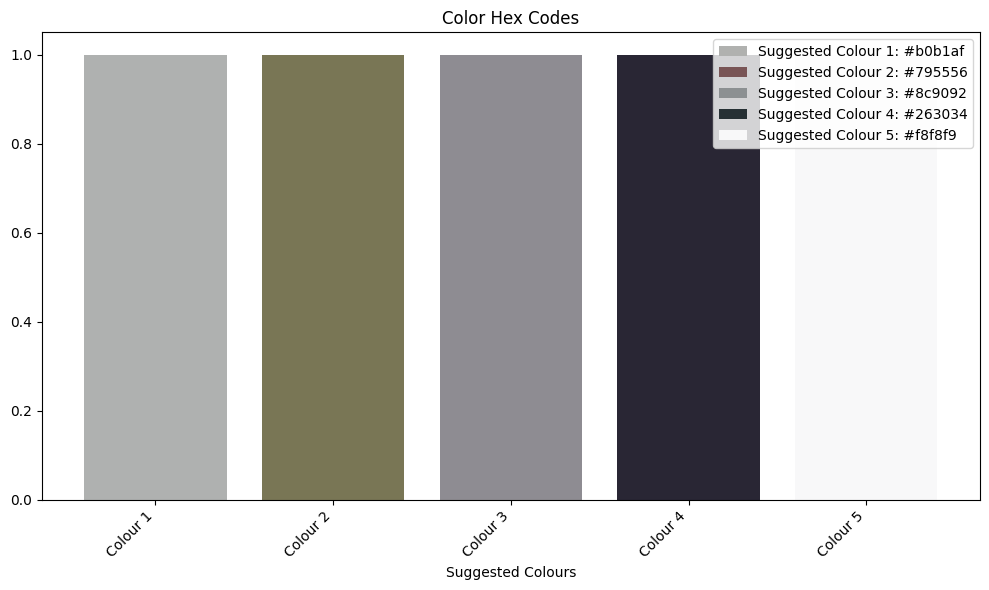

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the color palette data from the CSV file
csv_filename = '/content/drive/MyDrive/ML_project/image_palette.csv'
palette_df = pd.read_csv(csv_filename)

# Extracting the analogous colors (assuming they are stored as hexadecimal values in the 'Analogous Colors' column)
analogous_colors_hex = palette_df['Analogous Colors'].apply(eval)  # Convert string representation to list

# Creating a bar plot for analogous colors
plt.figure(figsize=(10, 6))
for i, colors in enumerate(analogous_colors_hex):
    plt.bar(i, 1, color=colors[0], label=f'Suggested Colour {i+1}: {colors[0]}')
    plt.bar(i, 1, color=colors[1])

plt.xticks(range(len(analogous_colors_hex)), [f'Colour {i+1}' for i in range(len(analogous_colors_hex))], rotation=45, ha='right')
plt.xlabel('Suggested Colours')
plt.title('Color Hex Codes')
plt.legend()

plt.tight_layout()
plt.show()
